# Week 1B: Exploratory Data Science in Python

9/7/2022

## Today

- Introduction to Pandas
- Key data analysis concepts
- Example: Zillow + Census housing data

## Reminder: The weekly workflow

- You'll set up your local Python environment as part of first homework assignment (posted today!)
- Each week, you will have two options to follow along with lectures:
    1. Using Binder in the cloud, launching via the button on the week's repository
    1. Download the week's repository to your laptop and launch the notebook locally
- Work on homeworks locally on your laptop — Binder is only a *temporary* environment (no save features)

To follow along today, go to https://github.com/MUSA-550-Fall-2022/week-1

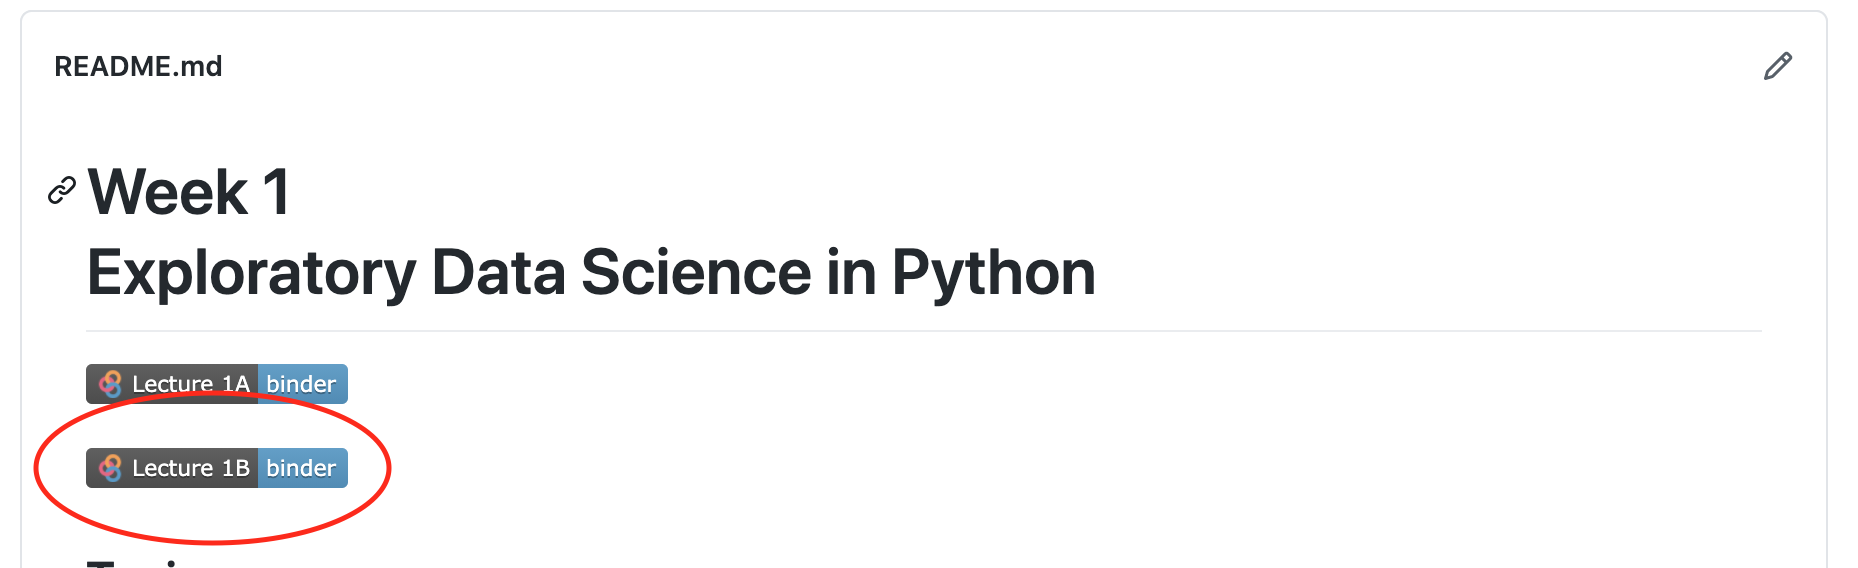

## Python Data Analysis: the *pandas* package

Documentation is available at https://pandas.pydata.org

<center>
<img src=attachment:download.png width=400></img>
</center>
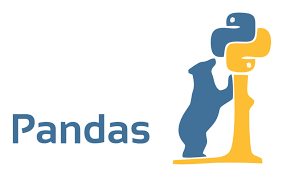

## The new, less fun logo

<center>
    <img width=500 src="https://raw.githubusercontent.com/pandas-dev/pandas/master/web/pandas/static/img/pandas.svg"></img>
</center>

The following line imports the *pandas* package:

In [1]:
import pandas as pd

## Basic *pandas* concepts

The primary *objects* in *pandas* are the:

  * **`DataFrame`**, which is very similar to an Excel spreadsheet, and has rows and named columns
  * **`Series`**, which represents a single column of data. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [R](https://www.r-project.org/about.html).

You can think `Series` objects as fancier versions of Python's built-in list data type

To create a `Series` object:

In [2]:
# city names and population
city_names = pd.Series(["San Francisco", "San Jose", "Sacramento"])
population = pd.Series([852469, 1015785, 485199])

In [3]:
city_names

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. 

In [4]:
cities_df = pd.DataFrame({"City Name": city_names, "Population": population})
cities_df

,City Name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


**Note:** always try to give your variables *meaningful names*. It will help immensely when you are trying to debug problems or when you're trying to understand the code you've written months later. 

## Accessing data

In [5]:
# access columns with a dict-like syntax
cities_df["Population"]

0     852469
1    1015785
2     485199
Name: Population, dtype: int64

### Rows can be accessed using Python's syntax for slicing 

In [6]:
# list slicing: get the elements with indices 1 and 2 (but NOT 3)
cities_list = ["San Francisco", "San Jose", "Sacramento"]
cities_list[:2]

['San Francisco', 'San Jose']

Unfortunately the functionality for slicing lists is not that powerful...but pandas will have many more features!

In [7]:
# slicing data frame rows is very similar!
cities_df[:2]

,City Name,Population
0,San Francisco,852469
1,San Jose,1015785


*pandas* includes functionality for many different ways of selecting data. See [the documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for many more examples. 

## Manipulating data

In [8]:
cities_df["Population"].median()

852469.0

[NumPy](http://www.numpy.org/) is a popular toolkit for scientific computing. 

*pandas* `Series` can be used as arguments to most NumPy functions:

In [9]:
import numpy as np

# calculate the median population value
np.median(cities_df["Population"])

852469.0

For more complex single-column transformations, you can use `Series.apply`. It accepts a function that is applied to each value in the `Series`.

For example, we can find which cities have a population greater than a million:

In [10]:
# define our function
def get_large_cities(population):
    return population > 1e6


large_cities_sel = cities_df["Population"].apply(get_large_cities)

In [11]:
large_cities_sel

0    False
1     True
2    False
Name: Population, dtype: bool

In [12]:
# add the new computed column to our original data frame
cities_df["Large Cities"] = large_cities_sel

small_cities_func = lambda population: population < 1e6

# we can also use lambda (unnamed, inline) functions
cities_df["Small Cities"] = cities_df["Population"].apply(small_cities_func)

# print out
cities_df

,City Name,Population,Large Cities,Small Cities
0,San Francisco,852469,False,True
1,San Jose,1015785,True,False
2,Sacramento,485199,False,True


### Data selection

We can select the "large" cities by passing the boolean values to the `.loc()` function of a `DataFrame`:

In [13]:
cities_df["Large Cities"]

0    False
1     True
2    False
Name: Large Cities, dtype: bool

In [14]:
cities_df.loc[cities_df["Large Cities"]]

,City Name,Population,Large Cities,Small Cities
1,San Jose,1015785,True,False


### There is a faster, more concise, to achieve this!

In [15]:
cities_df["Population"] > 1e6

0    False
1     True
2    False
Name: Population, dtype: bool

In [16]:
# this is equivalent to doing
cities_df.loc[cities_df["Population"] < 1e6]

,City Name,Population,Large Cities,Small Cities
0,San Francisco,852469,False,True
2,Sacramento,485199,False,True


### What about getting rows where "Large Cities" is False?

Use the Python tilde operator to do a logicial *not* operation:

In [17]:
# reverse the large cities boolean selection
cities_df.loc[~large_cities_sel]

,City Name,Population,Large Cities,Small Cities
0,San Francisco,852469,False,True
2,Sacramento,485199,False,True


In [18]:
# or equivalently:
# NOTE: you need to put the whole expression in () and then apply the tilde!
cities_df.loc[~(cities_df["Population"] > 1e6)]

,City Name,Population,Large Cities,Small Cities
0,San Francisco,852469,False,True
2,Sacramento,485199,False,True


### An even faster way!

We can use the [pandas query function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html). 

The query() function will return a subset of your dataframe based on a string version of the boolean expression.

In [19]:
cities_df.query("Population < 1e6")

,City Name,Population,Large Cities,Small Cities
0,San Francisco,852469,False,True
2,Sacramento,485199,False,True


## How to remember the specifics of all of these functions?

The documentation is your best friend! Use the question mark operator!

In [20]:
# use the question mark
pd.DataFrame.loc?

## Now onto a more interesting example...

## Analyzing trends in rentals rates over time

Let's load census data on rentals rates from the 2019 Amercian Community Survey. 

We've stored the data locally in the comma-separated value (CSV) format. Later in the course, you'll learn how to download them directly using Python.

Use the `read_csv()` function from *pandas*. The first argument to `read_csv()` is the file path to load.

In [21]:
census_df = pd.read_csv("./data/census/ACS_19_1YR_B25003.csv")

In [22]:
census_df.head(n=5)

,GEO.id,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03
0,1600000US0103076,"Auburn city, Alabama",26156,2687,13095,1829,13061,2108
1,1600000US0107000,"Birmingham city, Alabama",93300,3618,37788,2635,55512,2788
2,1600000US0121184,"Dothan city, Alabama",27103,1044,15891,824,11212,817
3,1600000US0135896,"Hoover city, Alabama",32461,1606,22391,1515,10070,1496
4,1600000US0137000,"Huntsville city, Alabama",88930,2823,48728,2758,40202,2550


Select certain columns and rename them.

- Total: Total occupied housing units
- Rentals: Renter-occupied housing units

In [23]:
## FIRST STEP: let's trim to the columns we want

# columns we want
columns = ["GEO.display-label", "HD01_VD01", "HD01_VD03"]
census_df = census_df[columns]

In [24]:
# Peak at the dataframe with trimmed columns
census_df.head()

,GEO.display-label,HD01_VD01,HD01_VD03
0,"Auburn city, Alabama",26156,13061
1,"Birmingham city, Alabama",93300,55512
2,"Dothan city, Alabama",27103,11212
3,"Hoover city, Alabama",32461,10070
4,"Huntsville city, Alabama",88930,40202


In [25]:
## STEP 2: Let's rename the columns!

# rename columns
census_df.columns = ["City", "Total", "Rentals"]

# Return the head (first 5 rows) from the cell
census_df.head(n=5)

,City,Total,Rentals
0,"Auburn city, Alabama",26156,13061
1,"Birmingham city, Alabama",93300,55512
2,"Dothan city, Alabama",27103,11212
3,"Hoover city, Alabama",32461,10070
4,"Huntsville city, Alabama",88930,40202


In [26]:
# Step 3: Add the rental rate as a new column
census_df['Rental Rate'] = census_df['Rentals'] / census_df['Total'] * 100

census_df.head()

,City,Total,Rentals,Rental Rate
0,"Auburn city, Alabama",26156,13061,49.935005
1,"Birmingham city, Alabama",93300,55512,59.498392
2,"Dothan city, Alabama",27103,11212,41.368114
3,"Hoover city, Alabama",32461,10070,31.021842
4,"Huntsville city, Alabama",88930,40202,45.206342


In [27]:
# How many rows are in the dataframe? --> use the len() operator

len(census_df)

634

We can select the largest cities by population using the `Series.isin()` function, which checks if each value in the `Series` is in the specified list. 

In [28]:
# Define the list of city names we want
top_cities_list = [
    "Philadelphia city, Pennsylvania",
    "New York city, New York",
    "Los Angeles city, California",
    "Houston city, Texas",
    "Chicago city, Illinois",
    "Phoenix city, Arizona",
]

In [29]:
# Use the isin() to test whether a row value is in a city
census_df["City"].isin(top_cities_list)

0      False
1      False
2      False
3      False
4      False
       ...  
629    False
630    False
631    False
632    False
633    False
Name: City, Length: 634, dtype: bool

In [30]:
# Now do the selection!
census_df.loc[census_df["City"].isin(top_cities_list)]  # select the valid rows

,City,Total,Rentals,Rental Rate
19,"Phoenix city, Arizona",586878,267225,45.533314
94,"Los Angeles city, California",1398900,887785,63.463078
284,"Chicago city, Illinois",1080345,603352,55.848086
439,"New York city, New York",3211033,2188214,68.146730
487,"Philadelphia city, Pennsylvania",619505,295783,47.745055
538,"Houston city, Texas",876504,522942,59.662249


Only 6 rows as expected!

Alternatively, we could use the query() function. The syntax is a bit different (and I always forget and have to look at the documentation).

In the query() string, you can reference existing variables by prefacing the variable name with an "@" symbol. 

For example:

In [31]:
# Get the rows where the City column is in "top_cities_list"
census_df.query("City in @top_cities_list")

,City,Total,Rentals,Rental Rate
19,"Phoenix city, Arizona",586878,267225,45.533314
94,"Los Angeles city, California",1398900,887785,63.463078
284,"Chicago city, Illinois",1080345,603352,55.848086
439,"New York city, New York",3211033,2188214,68.146730
487,"Philadelphia city, Pennsylvania",619505,295783,47.745055
538,"Houston city, Texas",876504,522942,59.662249


## Python f-strings

Python version 3.6 (we are using python 3.9) introduced a new and improved string formatting syntax, where the variable that is being inserted can be referenced directly using the variable name.

The variable name should be enclosed in curly braces inside the string:

In [32]:
year_str = "19"
path = f"./data/census/ACS_{year_str}_1YR_B25003.csv"
print(path) 

./data/census/ACS_19_1YR_B25003.csv


For more info: see [this guide](https://realpython.com/python-f-strings/)

### Now let's load data from 2005 to 2019

Let's use a for loop to loop over each year value from 2005 to 2019

In [33]:
all_rental_data = []
start_year = 2005
stop_year = 2019
for year in range(start_year, stop_year + 1):
    
    #---------------------------------------------
    # Step 0: Print out year 
    # The variable year changes for each iteration of the loop
    #----------------------------------------------
    print(f"Loading data for year = {year}...")
    
    #---------------------------------
    # Step 1: Read data for this year
    #---------------------------------
    year_str = str(year) # convert integer value of "year" to a string
    year_str = year_str[2:] # extract the last two digits of the year string
    rental_df = pd.read_csv(f"./data/census/ACS_{year_str}_1YR_B25003.csv")
     
    #---------------------------------
    # Step 2: Columns we want
    #---------------------------------
    columns = ['GEO.display-label', 'HD01_VD01', 'HD01_VD03']
    rental_df = rental_df[columns]

    #---------------------------------
    # Step 3: Rename columns
    #---------------------------------
    rental_df.columns = ['City', 'Total', 'Rentals']
    
    #----------------------------------
    # Step 4: Calculate the rental rate
    #----------------------------------
    rental_df['Rental Rate'] = rental_df['Rentals'] / rental_df['Total'] * 100
    
    #----------------------------------
    # Step 5: Select the cities we want
    #----------------------------------
    selection = rental_df['City'].isin(top_cities_list)
    top_cities_df = rental_df.loc[selection].copy()
    
    #----------------------------------
    # Step 6: Add a column for the year
    #----------------------------------
    top_cities_df['Year'] = year
    
    #-----------------------------------
    # Step 7: Save this dataframe in the list
    #-----------------------------------
    all_rental_data.append(top_cities_df)

#---------------------------------------------------
# Step 8: After the for loop, combine all of the 
# data frames into one along the row axis
#---------------------------------------------------
all_rental_data = pd.concat(all_rental_data, axis=0)

Loading data for year = 2005...
Loading data for year = 2006...
Loading data for year = 2007...
Loading data for year = 2008...
Loading data for year = 2009...
Loading data for year = 2010...
Loading data for year = 2011...
Loading data for year = 2012...
Loading data for year = 2013...
Loading data for year = 2014...
Loading data for year = 2015...
Loading data for year = 2016...
Loading data for year = 2017...
Loading data for year = 2018...
Loading data for year = 2019...


In [34]:
# Note: the pd.concat() took a list of dataframes and converted them 
# into a single dataframe!
type(all_rental_data)

pandas.core.frame.DataFrame

In [35]:
all_rental_data.head()

,City,Total,Rentals,Rental Rate,Year
13,"Phoenix city, Arizona",503753,204914,40.677475,2005
75,"Los Angeles city, California",1284124,771325,60.066240,2005
218,"Chicago city, Illinois",1020605,525620,51.500825,2005
349,"New York city, New York",3026196,2023924,66.880136,2005
393,"Philadelphia city, Pennsylvania",565433,244792,43.292839,2005


In [36]:
# What about the tail?
all_rental_data.tail()

,City,Total,Rentals,Rental Rate,Year
94,"Los Angeles city, California",1398900,887785,63.463078,2019
284,"Chicago city, Illinois",1080345,603352,55.848086,2019
439,"New York city, New York",3211033,2188214,68.146730,2019
487,"Philadelphia city, Pennsylvania",619505,295783,47.745055,2019
538,"Houston city, Texas",876504,522942,59.662249,2019


In [37]:
# How many rows? Hopefully (6 cities x 15 years = 90!)
len(all_rental_data)

90

## Basic plotting: `matplotlib`

Much more to come next week. For now, we'll use some very simple plotting commands with Python's main plotting libary `matplotlib`.

Import the library we'll use from `matplotlib`.

In [38]:
from matplotlib import pyplot as plt

We'll use the `plot()` function which plots a simple `x` vs `y` line.

### The strategy

1. Create a figure axes to plot to
1. Loop over each unique city
1. Select the subset of the data for each city
1. Plot the 'Year' vs. 'Rental Rate' columns using the `plot()` function for the sub-selection data frame

### Note

To find the unique city names in the 'City' column, we can use the `unique()` function:

In [39]:
all_rental_data['City'].unique()

array(['Phoenix city, Arizona', 'Los Angeles city, California',
       'Chicago city, Illinois', 'New York city, New York',
       'Philadelphia city, Pennsylvania', 'Houston city, Texas'],
      dtype=object)

Phoenix city, Arizona
Los Angeles city, California
Chicago city, Illinois
New York city, New York
Philadelphia city, Pennsylvania
Houston city, Texas


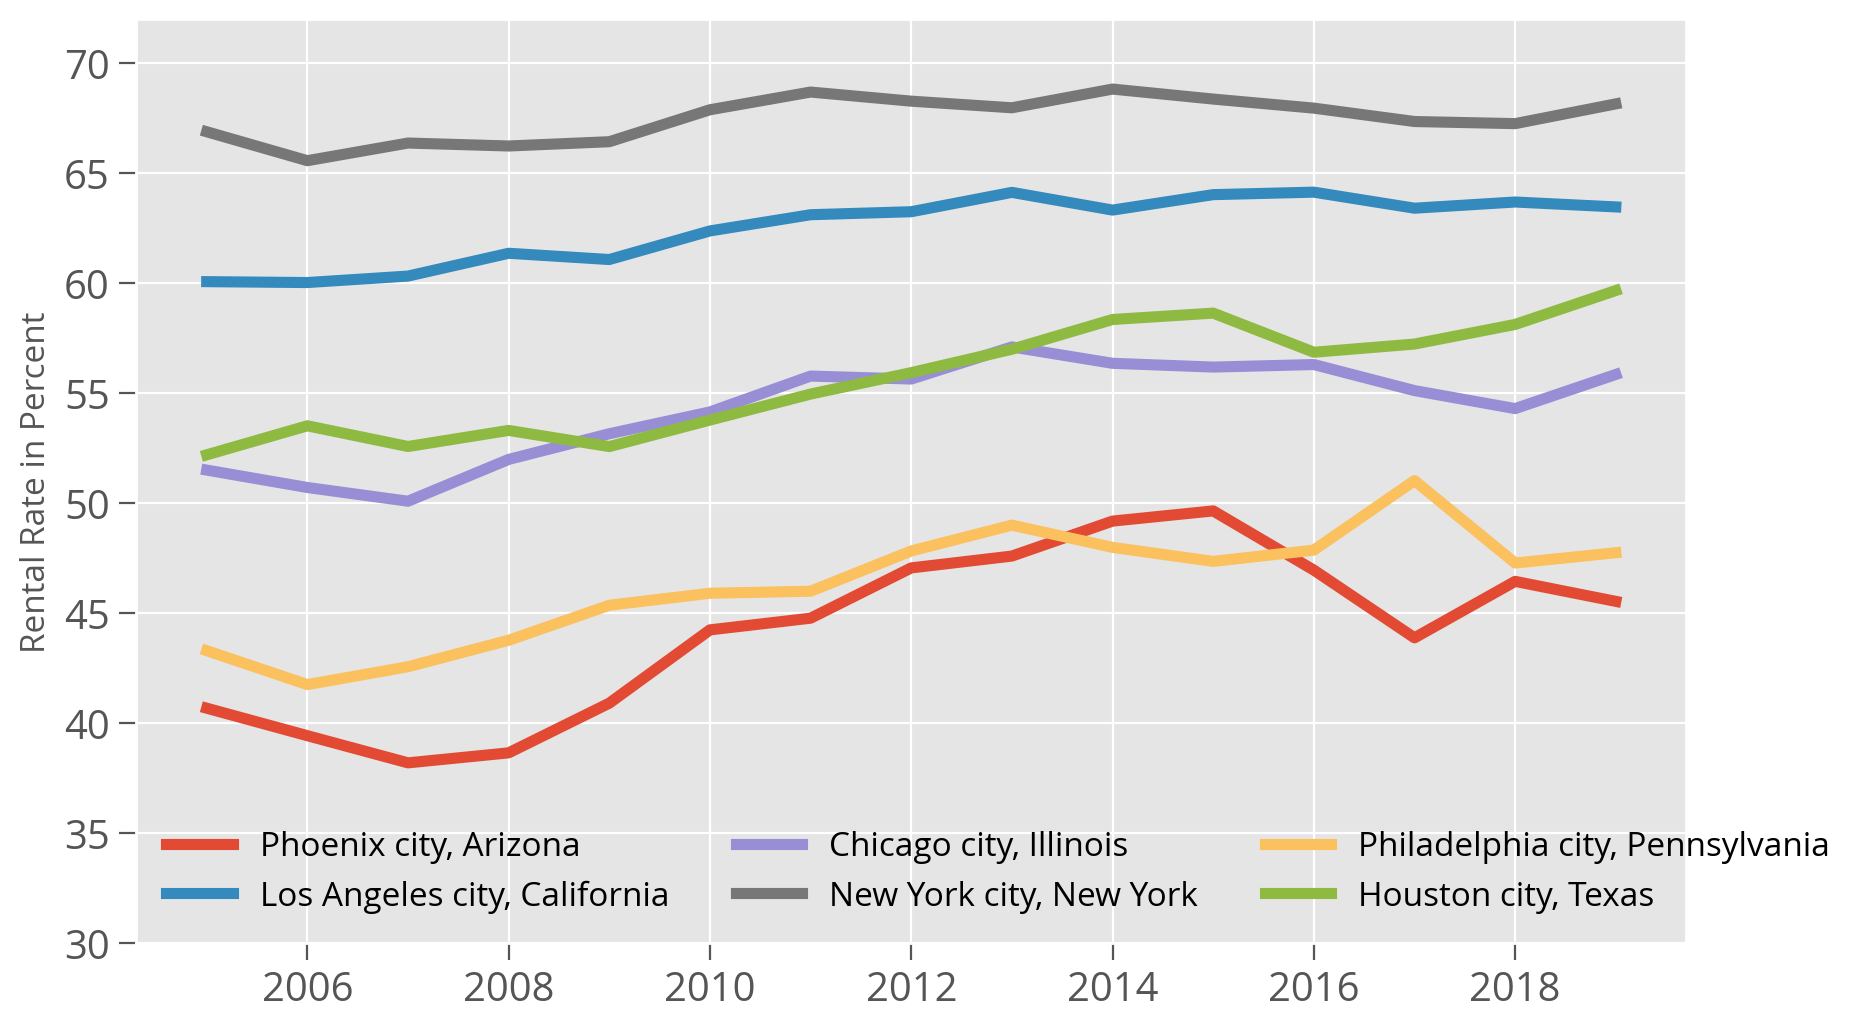

In [92]:
with plt.style.context('ggplot'):
    
    # Step 1: Create a figure and axes to plot on
    fig, ax = plt.subplots(figsize=(10,6))
    
    # Step 2: Loop over each city and plot
    for city in all_rental_data['City'].unique():
        
        # Print out the city in each loop iteration
        print(city)
        
        # Select data for this city
        this_city = all_rental_data['City'] == city
        city_df = all_rental_data.loc[this_city]
        
        # Plot Year vs Rental Rate
        ax.plot(city_df['Year'], city_df['Rental Rate'], label=city, linewidth=4)

    # Add a legend
    ax.legend(loc=0, ncol=3, fontsize=12)

    # Set the y limit
    ax.set_ylim(30, 72)

    # Add a y label
    ax.set_ylabel("Rental Rate in Percent")
    
    # Show
    plt.show()

**Note:** we used the "ggplot" theme to style our plots. Matplotlib comes with a number of built in styles: see all of the examples [here](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html).

## From 2005 to 2019, Philadelphia had the third largest percent increase

### Exercise: Can you calculate what the increase was for Philadelphia? 

You will need to:
1. Trim the full data set to just Philadelphia 
1. Select the rental rate for 2005
1. Select the rental rate for 2019
1. Calculate the percent change

### 1. Trim the full data set to just Philadelphia 

### 2. Select the rental rate for 2005

### 3. Select the rental rate for 2019

###  4. Calculate the percent change

## Now let's compare Zillow rental and home value data

Load citywide Zillow Rent Index (ZRI) and Zillow Home Value Index (ZHVI) data. 

Files were downloaded from https://www.zillow.com/research/data/

In [100]:
home_values = pd.read_csv("data/zillow/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
rent_values = pd.read_csv("data/zillow/Metro_ZORI_AllHomesPlusMultifamily_Smoothed.csv")

Peek at the first few rows of the ZRI data:

In [101]:
rent_values.head()

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07
0,102001,United States,0,1287.0,1298,1299.0,1306,1319,1329,1339,...,1869.0,1886,1903,1909.0,1933.0,1950.0,1973,1999,2019,2031
1,394913,"New York, NY",1,2322.0,2351,2358.0,2364,2398,2416,2435,...,2848.0,2873,2904,2937.0,2990.0,3040.0,3093,3157,3209,3246
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1812.0,1843,1830.0,1839,1862,1881,1899,...,2730.0,2754,2777,2796.0,2829.0,2859.0,2896,2930,2949,2964
3,394463,"Chicago, IL",3,1441.0,1454,1455.0,1460,1476,1490,1499,...,1784.0,1790,1803,1817.0,1831.0,1854.0,1877,1901,1919,1932
4,394514,"Dallas-Fort Worth, TX",4,1101.0,1127,1132.0,1148,1144,1147,1151,...,1673.0,1692,1703,1713.0,1728.0,1738.0,1764,1795,1823,1834


And do the same for the ZHVI data:

In [102]:
home_values.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,102001,0,United States,Country,NaN,128193.0,128540.0,128904.0,129647.0,130396.0,...,315164.0,319079.0,323445.0,328180.0,333400.0,338673.0,344230.0,349265.0,353446.0,355852.0
1,394913,1,"New York, NY",Msa,NY,225281.0,226627.0,227838.0,230222.0,232442.0,...,571576.0,575145.0,578396.0,582369.0,587022.0,593470.0,600621.0,608159.0,614185.0,618517.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,228935.0,229732.0,230953.0,233274.0,235763.0,...,842992.0,850126.0,859335.0,870012.0,882230.0,899552.0,918626.0,935074.0,936406.0,933282.0
3,394463,3,"Chicago, IL",Msa,IL,170843.0,171246.0,171768.0,172812.0,173918.0,...,287525.0,290233.0,292966.0,295614.0,298193.0,301504.0,304988.0,308971.0,311970.0,313828.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130922.0,131027.0,131114.0,131327.0,131550.0,...,334386.0,339874.0,345774.0,353216.0,361748.0,369869.0,379389.0,388117.0,395694.0,397905.0


## Selecting the cities we want

In [103]:
valid_cities = [
    "New York, NY",
    "Chicago, IL",
    "Los Angeles-Long Beach-Anaheim, CA",
    "Philadelphia, PA",
    "Houston, TX",
    "Phoenix, AZ",
]

In [104]:
selection =  home_values['RegionName'].isin(valid_cities)
home_values_trimmed = home_values.loc[selection]

In [105]:
selection = rent_values['RegionName'].isin(valid_cities)
rent_values_trimmed = rent_values.loc[selection]

In [106]:
rent_values_trimmed

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07
1,394913,"New York, NY",1,2322.0,2351,2358.0,2364,2398,2416,2435,...,2848.0,2873,2904,2937.0,2990.0,3040.0,3093,3157,3209,3246
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1812.0,1843,1830.0,1839,1862,1881,1899,...,2730.0,2754,2777,2796.0,2829.0,2859.0,2896,2930,2949,2964
3,394463,"Chicago, IL",3,1441.0,1454,1455.0,1460,1476,1490,1499,...,1784.0,1790,1803,1817.0,1831.0,1854.0,1877,1901,1919,1932
5,394974,"Philadelphia, PA",5,1334.0,1300,1321.0,1324,1333,1344,1349,...,1730.0,1745,1767,1762.0,1773.0,1787.0,1800,1816,1832,1844
6,394692,"Houston, TX",6,1164.0,1192,1181.0,1189,1214,1227,1241,...,1523.0,1531,1541,1539.0,1550.0,1561.0,1573,1587,1599,1602
14,394976,"Phoenix, AZ",14,947.0,961,956.0,957,966,972,974,...,1830.0,1855,1862,1873.0,1883.0,1895.0,1910,1923,1926,1921


## Removing unwanted columns

Unwanted columns can be *dropped* from the data frame using the `drop()` function.

Note that the column axis is the second axis (`axis=1`), and if you wanted to remove rows, you could use the first axis (`axis=0`).

In [107]:
x = ['SizeRank', 'RegionID', "RegionType", "StateName"]
home_values_final = home_values_trimmed.drop(x, axis=1)

In [108]:
columns = ['SizeRank', 'RegionID']
rent_values_final = rent_values_trimmed.drop(columns, axis=1)

In [109]:
rent_values_final

,RegionName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,...,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07
1,"New York, NY",2322.0,2351,2358.0,2364,2398,2416,2435,2443,2446,...,2848.0,2873,2904,2937.0,2990.0,3040.0,3093,3157,3209,3246
2,"Los Angeles-Long Beach-Anaheim, CA",1812.0,1843,1830.0,1839,1862,1881,1899,1915,1924,...,2730.0,2754,2777,2796.0,2829.0,2859.0,2896,2930,2949,2964
3,"Chicago, IL",1441.0,1454,1455.0,1460,1476,1490,1499,1502,1496,...,1784.0,1790,1803,1817.0,1831.0,1854.0,1877,1901,1919,1932
5,"Philadelphia, PA",1334.0,1300,1321.0,1324,1333,1344,1349,1354,1358,...,1730.0,1745,1767,1762.0,1773.0,1787.0,1800,1816,1832,1844
6,"Houston, TX",1164.0,1192,1181.0,1189,1214,1227,1241,1249,1249,...,1523.0,1531,1541,1539.0,1550.0,1561.0,1573,1587,1599,1602
14,"Phoenix, AZ",947.0,961,956.0,957,966,972,974,978,981,...,1830.0,1855,1862,1873.0,1883.0,1895.0,1910,1923,1926,1921


## Wide vs long format for datasets

Currently, our data is in **wide** format $\rightarrow$ each observation has its own column. This usually results in many columns but few rows.

In [110]:
home_values_final

,RegionName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
1,"New York, NY",225281.0,226627.0,227838.0,230222.0,232442.0,234805.0,237288.0,239859.0,242437.0,...,571576.0,575145.0,578396.0,582369.0,587022.0,593470.0,600621.0,608159.0,614185.0,618517.0
2,"Los Angeles-Long Beach-Anaheim, CA",228935.0,229732.0,230953.0,233274.0,235763.0,238114.0,240521.0,243047.0,245453.0,...,842992.0,850126.0,859335.0,870012.0,882230.0,899552.0,918626.0,935074.0,936406.0,933282.0
3,"Chicago, IL",170843.0,171246.0,171768.0,172812.0,173918.0,175015.0,176228.0,177589.0,178995.0,...,287525.0,290233.0,292966.0,295614.0,298193.0,301504.0,304988.0,308971.0,311970.0,313828.0
5,"Philadelphia, PA",130359.0,130796.0,131058.0,131710.0,132238.0,132835.0,133383.0,133967.0,134615.0,...,310909.0,313401.0,315690.0,318248.0,320804.0,324066.0,327757.0,332095.0,335593.0,338231.0
6,"Houston, TX",126394.0,126472.0,126353.0,126472.0,126479.0,126681.0,126811.0,127090.0,127446.0,...,274426.0,277596.0,281019.0,284479.0,288795.0,294155.0,300160.0,305742.0,309933.0,312533.0
14,"Phoenix, AZ",142839.0,143215.0,143669.0,144561.0,145451.0,146126.0,146849.0,147535.0,148362.0,...,418635.0,424834.0,430947.0,436727.0,445371.0,454535.0,465962.0,474655.0,480985.0,478985.0


Usually it's better to have data in [**tidy**](https://en.wikipedia.org/wiki/Tidy_data) (also known as **long**) format.

Tidy datasets are arranged such that each variable is a column and each observation is a row.

In our case, we want to have a column called `ZRI` and one called `ZHVI` and a row for each month that the indices were measured. 

*pandas* provides the `melt()` function for converting from **wide** formats to **tidy** formats.

`melt()` **doesn’t** aggregate or summarize the data. It transforms it into a different shape, but it contains the exact same information as before.

Imagine you have 6 rows of data (each row is a unique city) with 10 columns of home values (each column is a different month). That is wide data and is the format usually seen in spreadsheets or tables in a report.

If you `melt()` that wide data, you would get a table with 60 rows and 3 columns. Each row would contain the city name, the month, and the home value that city and month. This tidy-formatted data contains the same info as the wide data, but in a different form.

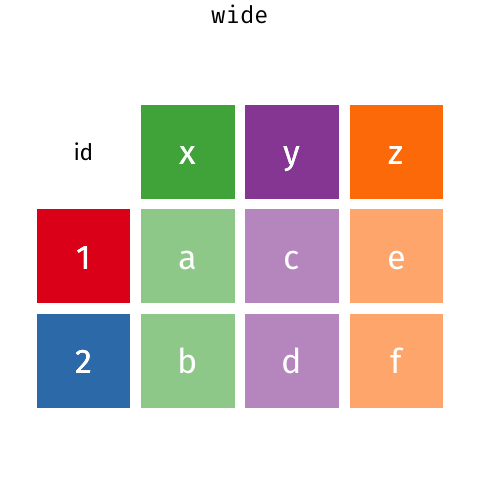

**This animation shows the transformation from wide to long / long to wide. You can ignore gather() and spread() - those are the R versions of the pandas functions.**

In [111]:
pd.melt?

Now, let's *melt* our datasets:

In [114]:
ZHVI = pd.melt(
    home_values_final, 
    id_vars=["RegionName"],
    value_vars=home_values_final.columns[1:],
    value_name="ZHVI", 
    var_name="Date"
)
ZRI = pd.melt(
    rent_values_final, 
    id_vars=["RegionName"], 
    value_vars=rent_values_final.columns[1:],
    value_name="ZRI", 
    var_name="Date"
)

and take a look:

In [116]:
ZRI.tail()

,RegionName,Date,ZRI
613,"Los Angeles-Long Beach-Anaheim, CA",2022-07,2964.0
614,"Chicago, IL",2022-07,1932.0
615,"Philadelphia, PA",2022-07,1844.0
616,"Houston, TX",2022-07,1602.0
617,"Phoenix, AZ",2022-07,1921.0


In [117]:
ZHVI.tail()

,RegionName,Date,ZHVI
1621,"Los Angeles-Long Beach-Anaheim, CA",2022-07-31,933282.0
1622,"Chicago, IL",2022-07-31,313828.0
1623,"Philadelphia, PA",2022-07-31,338231.0
1624,"Houston, TX",2022-07-31,312533.0
1625,"Phoenix, AZ",2022-07-31,478985.0


## Merging data frames

Another common operation is **merging**, also known as **joining**, two datasets. 

We can use the `merge()` function to merge observations that have the same `Date` and `RegionName` values.

## But first! Our date string formats don't match!

- `ZVHI` has the Date column in the format of YYYY-MM-DD
- `ZRI` has the Date column in the format of YYYY-MM

**We need to put them into the same format before merging the data!**

We can fix this by create `Datetime` objects and formatting the dates into the same format.

## Datetime objects
Currently our `Date` column is stored as a `string`. 

*pandas* includes additional functionality for dates, but first we must convert the strings using the `to_datetime()` function.

In [118]:
# Convert the Date column to Datetime objects
ZHVI["Date"] = pd.to_datetime(ZHVI["Date"])

## The `strftime` function

We can use the [".dt" property](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) of the `Date` column to access datetime functions of the new Datetime column.

For converting to strings in a certain format, we can use the "strftime" function ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html)). This uses a special syntax to convert the date object to a string with a specific format. 

**Important reference:** Use the [this strftime guide](https://strftime.org/) to look up the syntax!

In [119]:
# Extract YYYY-MM string
date_strings = ZHVI["Date"].dt.strftime("%Y-%m")

In [120]:
# First entry is a string!
date_strings.iloc[0]

'2000-01'

In [121]:
# Add the strings back as a column
ZHVI["Date"] = date_strings

In [122]:
ZHVI.head()

,RegionName,Date,ZHVI
0,"New York, NY",2000-01,225281.0
1,"Los Angeles-Long Beach-Anaheim, CA",2000-01,228935.0
2,"Chicago, IL",2000-01,170843.0
3,"Philadelphia, PA",2000-01,130359.0
4,"Houston, TX",2000-01,126394.0


## Now we can merge!

In [123]:
zillow_data = pd.merge(ZRI, ZHVI, on=['Date', 'RegionName'], how='outer')

In [124]:
zillow_data.sort_values("Date")

,RegionName,Date,ZRI,ZHVI
618,"New York, NY",2000-01,NaN,225281.0
619,"Los Angeles-Long Beach-Anaheim, CA",2000-01,NaN,228935.0
620,"Chicago, IL",2000-01,NaN,170843.0
621,"Philadelphia, PA",2000-01,NaN,130359.0
622,"Houston, TX",2000-01,NaN,126394.0
...,...,...,...,...
613,"Los Angeles-Long Beach-Anaheim, CA",2022-07,2964.0,933282.0
614,"Chicago, IL",2022-07,1932.0,313828.0
615,"Philadelphia, PA",2022-07,1844.0,338231.0
616,"Houston, TX",2022-07,1602.0,312533.0


Merging is very powerful and the merge can be done in a number of ways. See the [infographic](joining_infographic.jpg) on joining in this repository.

In [125]:
# Convert the Date column back to a Datetime
zillow_data["Date"] = pd.to_datetime(zillow_data["Date"])

**Quick trick:** `Series` that hold `Datetime` objects have a `dt` attribute that let's you grab parts of the date easily. 

For example, we can easily add new columns for the month and year using:

In [126]:
# Note the the dtype is now datetime64[ns]
zillow_data['Date'].head()

0   2014-01-01
1   2014-01-01
2   2014-01-01
3   2014-01-01
4   2014-01-01
Name: Date, dtype: datetime64[ns]

In [127]:
# Extract out the month and year of each date
# Add them to the data frame as new columns!
zillow_data['Month'] = zillow_data['Date'].dt.month
zillow_data['Year'] = zillow_data['Date'].dt.year 

In [128]:
zillow_data.head()

,RegionName,Date,ZRI,ZHVI,Month,Year
0,"New York, NY",2014-01-01,2322.0,396099.0,1,2014
1,"Los Angeles-Long Beach-Anaheim, CA",2014-01-01,1812.0,508611.0,1,2014
2,"Chicago, IL",2014-01-01,1441.0,196815.0,1,2014
3,"Philadelphia, PA",2014-01-01,1334.0,213563.0,1,2014
4,"Houston, TX",2014-01-01,1164.0,165854.0,1,2014


## Annual trends: grouping by `Year`

*pandas* is especially useful for grouping and aggregating data via the `groupby()` function.

From the *pandas* documentation, `groupby` means:
- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently.
- **Combining** the results into a data structure.

The documentation is available [here](https://pandas.pydata.org/pandas-docs/stable/groupby.html).

We can calculate annual averages for each year by grouping by the `RegionName` and `Year` columns and taking the mean of our desired column. For example:

In [129]:
# calculate mean values for each Year and City (RegionName)
annual_ZHVI = zillow_data.groupby(['RegionName', 'Year'])['ZHVI'].mean() 
annual_ZRI = zillow_data.groupby(['RegionName', 'Year'])['ZRI'].mean()

In [130]:
print(type(annual_ZHVI))

<class 'pandas.core.series.Series'>


In [131]:
annual_ZHVI.head()

RegionName   Year
Chicago, IL  2000    176107.833333
             2001    190745.250000
             2002    205350.500000
             2003    220379.916667
             2004    237042.833333
Name: ZHVI, dtype: float64

**Imporant:** The result of the groupby operation is always indexed by the group keys!


In this case, the result is indexed by the columns we grouped by (`RegionName` and `Year`). 

We can **reset the index** so that the index values are listed as columns in the data frame again. 

In [132]:
annual_ZHVI = annual_ZHVI.reset_index()
annual_ZRI = annual_ZRI.reset_index()

In [137]:
annual_ZHVI.head(n=50)

,RegionName,Year,ZHVI
0,"Chicago, IL",2000,176107.833333
1,"Chicago, IL",2001,190745.250000
2,"Chicago, IL",2002,205350.500000
3,"Chicago, IL",2003,220379.916667
4,"Chicago, IL",2004,237042.833333
5,"Chicago, IL",2005,257666.000000
6,"Chicago, IL",2006,274795.083333
7,"Chicago, IL",2007,276928.083333
8,"Chicago, IL",2008,257053.444444
9,"Chicago, IL",2009,227865.000000


## Plotting our results: ZHVI

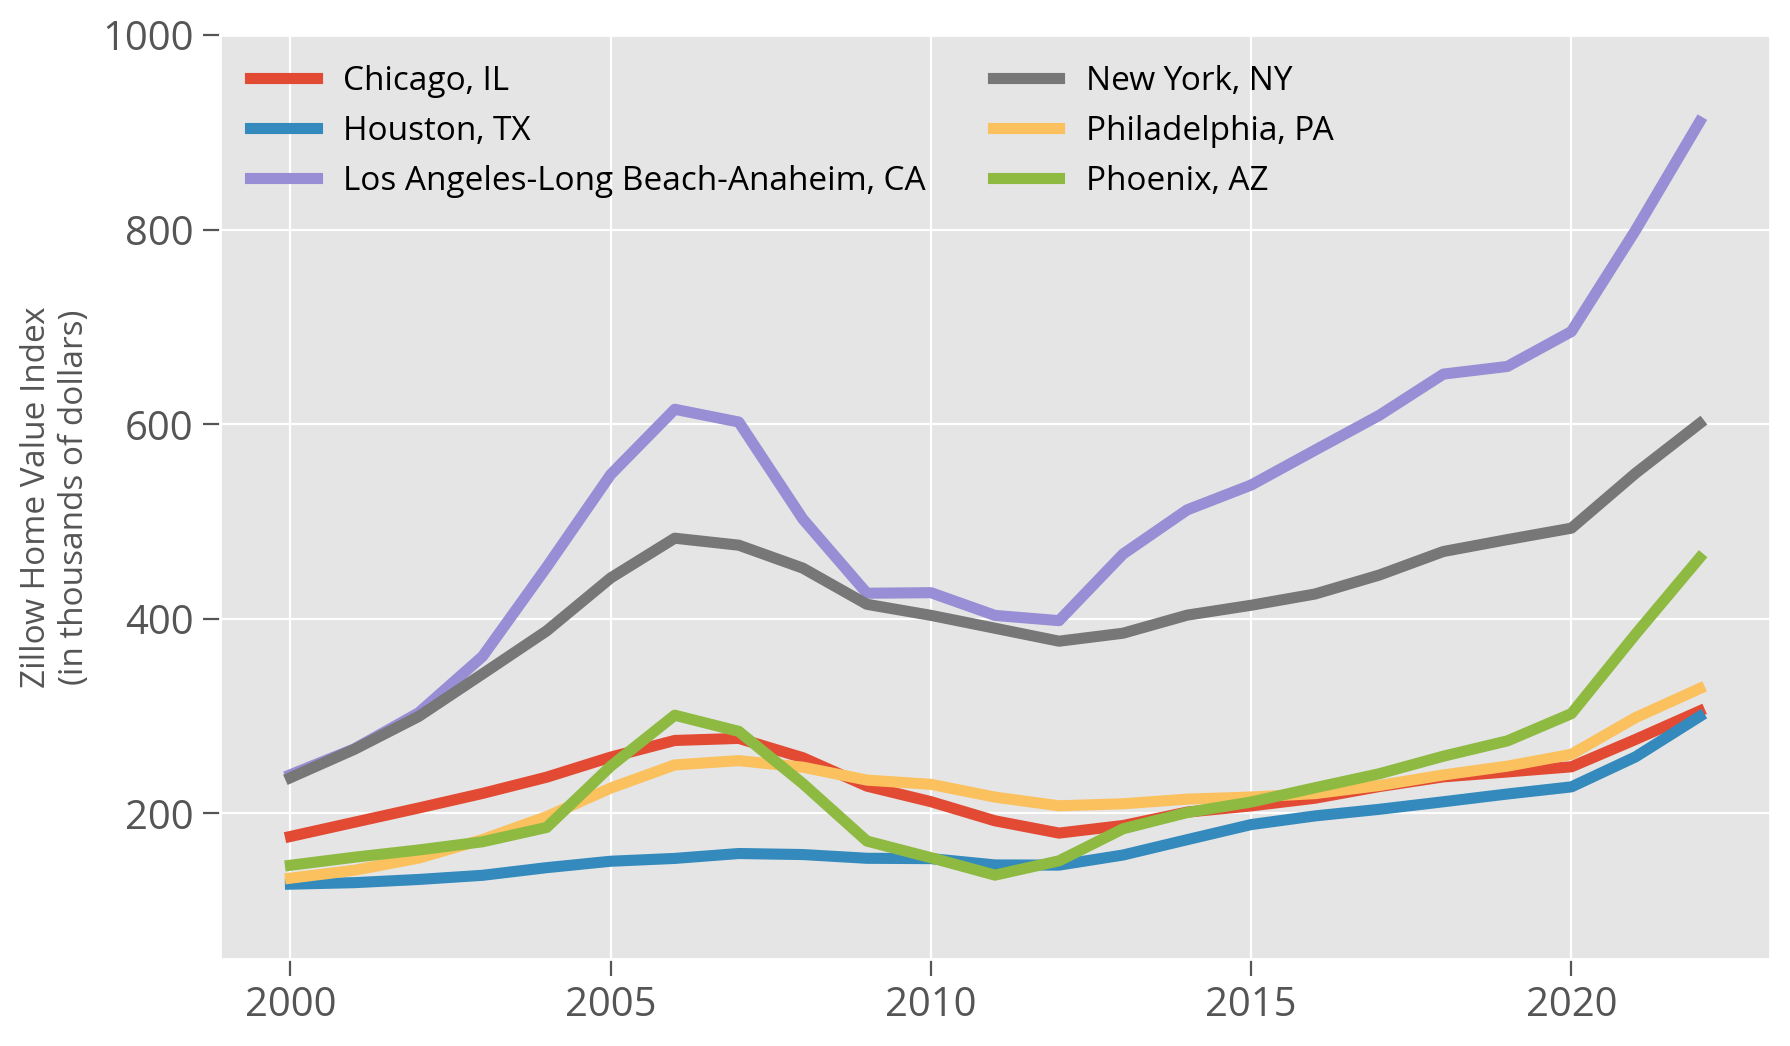

In [135]:
with plt.style.context("ggplot"):

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot for each unique city
    for city in annual_ZHVI["RegionName"].unique():
        
        # select the data for this city
        selection = annual_ZHVI["RegionName"] == city
        df = annual_ZHVI.loc[selection]

        # plot
        ax.plot(df["Year"], df["ZHVI"] / 1e3, label=city, linewidth=4)

    
    # Format the axes
    ax.set_ylim(50, 1000)
    ax.legend(loc=0, ncol=2, fontsize=12)
    ax.set_ylabel("Zillow Home Value Index\n(in thousands of dollars)")
    
    # Show
    plt.show()

### Home values in Philadelphia have only recently recovered to pre-2008 levels

## Plotting the results: Zillow Rent Index

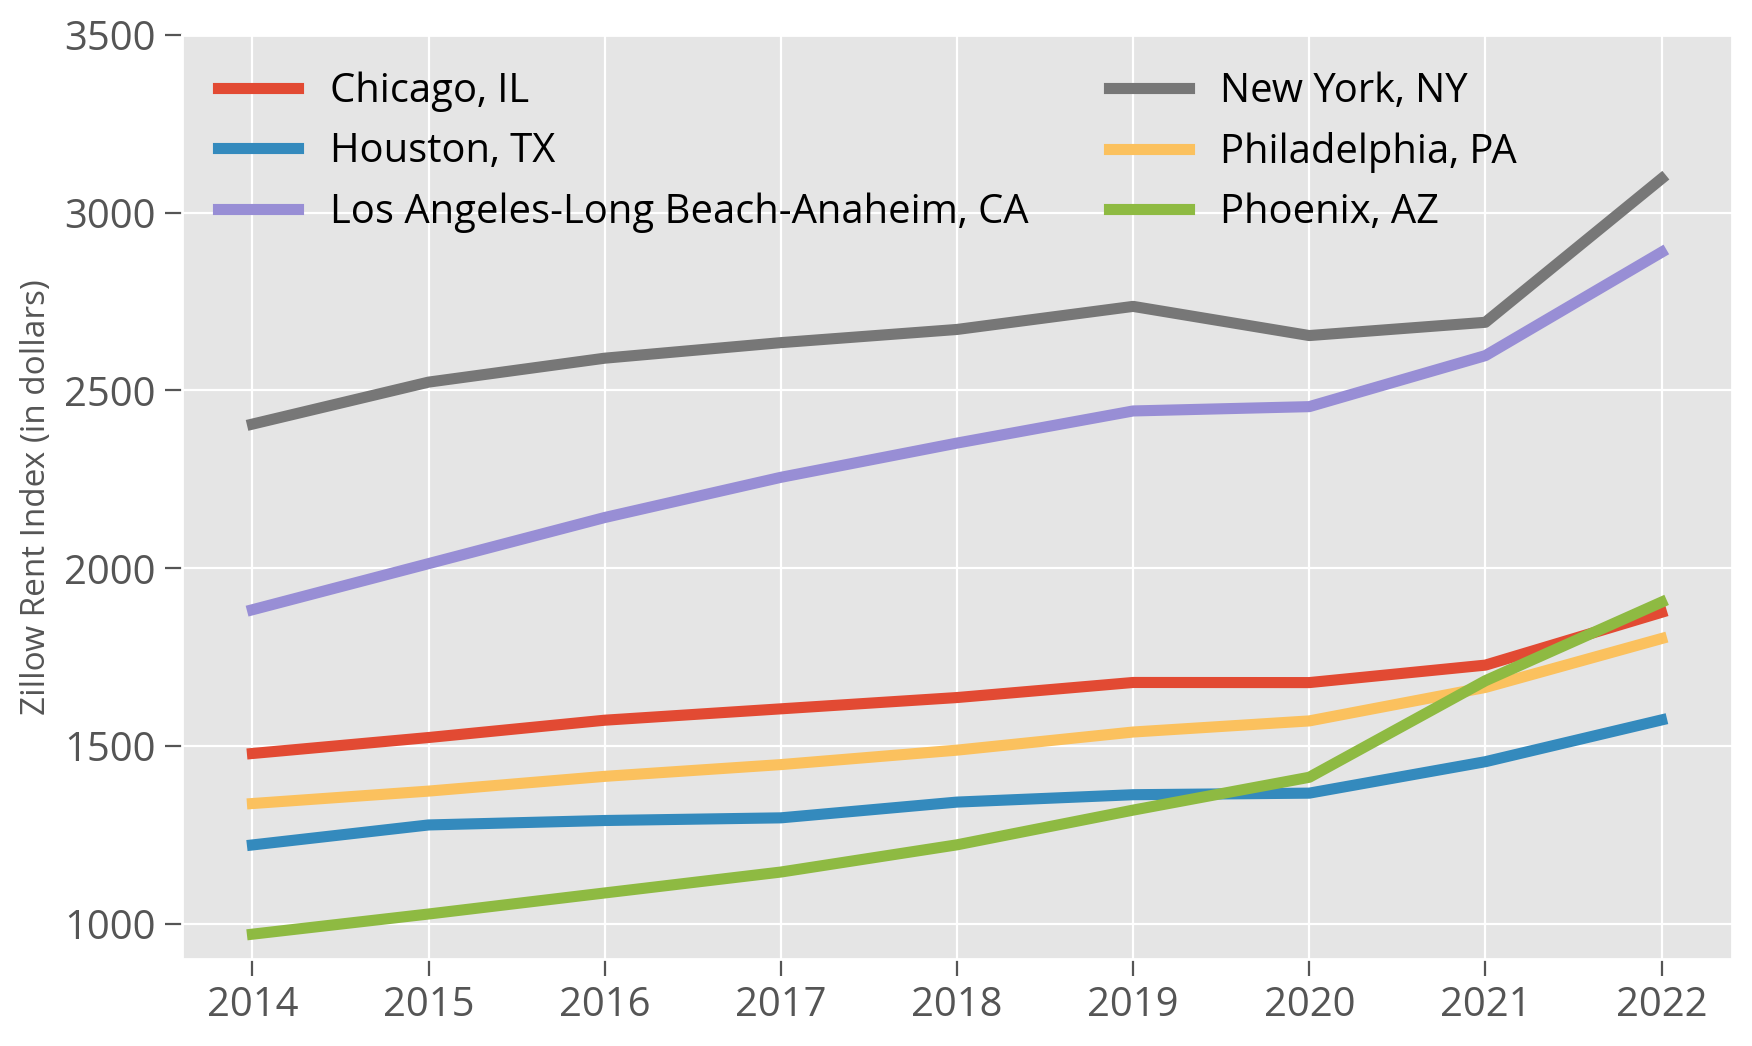

In [140]:
with plt.style.context('ggplot'):
    
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(10,6))
    
    # Loop over the cities to plot each one
    for city in annual_ZRI['RegionName'].unique():
        
        # Select the city data
        selection = annual_ZRI['RegionName'] == city
        df = annual_ZRI.loc[selection]
        
        # Plot
        ax.plot(df['Year'], df['ZRI'], label=city, linewidth=4)
    
    # Format
    ax.set_ylim(900, 3500)
    ax.legend(loc=0, ncol=2)
    ax.set_ylabel('Zillow Rent Index (in dollars)')
    
    # Show
    plt.show();

### Rent prices in Philadelphia have remained relatively flat, relative to other large cities.

## First Homework Assignment

Available on GitHub: 

https://github.com/MUSA-550-Fall-2022/assignment-1

Two parts: 

1. Download and install Python locally on your computer. Instructions in the assignment README!
1. Analyze Zillow ZHVI data by ZIP code in Philadelphia, submitting your Jupyter notebook.

**Due date: Monday 9/19 by the start of class (7pm)**

# That's it!

- Next week: Data Visualization Fundamentals
- Office hours:
    - Nick: Saturdays, 10AM-12PM
    - Kristin: Tuesday/Thursday 11AM-12PM, remote via Zoom
    - Sign up for 15-minute time slots on Canvas (Zoom info in calendar invite)
- Post questions on Piazza!
- Email questions/concerns to nhand@design.upenn.edu